# **INTRODUCTION:**


In this project, we will use Python, specifically the PyMySQL library, to interact with a MySQL database in order to analyze and gain insights from crime data. The dataset includes information such as DR NO, Date Reported, Date Occurred, Area Name, Crime Code, Crime Code Description, Victim Age, Victim Sex, Premises Description, Status, Location, Latitude, and Longitude.

### **INSTALATION OF LIBRARIES:**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
pip install pymysql

In [ ]:
import pymysql

In [ ]:
connection = pymysql.connect(
    host='localhost',
    user='root',
    password='9594',
    database='first_db')

In [ ]:
cursor=connection.cursor()

In [ ]:
df=pd.read_csv('crime_data.csv')
df.head(2)

DR_NO   Date_Rptd    DATE_OCC  AREA_NAME  Crm_Cd  \
0   10304468  01-08-2020  01-08-2020  Southwest     624   
1  190101086  01-02-2020  01-01-2020    Central     624   

                Crm_Cd_Desc  Vict_Age Vict_Sex             Premis_Desc Status  \
0  BATTERY - SIMPLE ASSAULT        36        F  SINGLE FAMILY DWELLING     AO   
1  BATTERY - SIMPLE ASSAULT        25        M                SIDEWALK     IC   

         Location    LAT     LON  
0  1100 W 39TH PL  34.01 -118.30  
1   700 S HILL ST  34.05 -118.25

#### **SHAPE OF OUR DATASET**

*   NUMBER OF ROWS & NUMBER OF COLUMNS


In [ ]:
df.shape

(499, 13)

In [ ]:
print("Number of Rows:",df.shape[0])
print("Number of Columns:",df.shape[1])

Number of Rows: 499
Number of Columns: 13


In [ ]:
df.info()   # Data types of Each Columns and Memories Requirements.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DR_NO        499 non-null    int64  
 1   Date_Rptd    499 non-null    object 
 2   DATE_OCC     499 non-null    object 
 3   AREA_NAME    499 non-null    object 
 4   Crm_Cd       499 non-null    int64  
 5   Crm_Cd_Desc  499 non-null    object 
 6   Vict_Age     499 non-null    int64  
 7   Vict_Sex     472 non-null    object 
 8   Premis_Desc  499 non-null    object 
 9   Status       499 non-null    object 
 10  Location     499 non-null    object 
 11  LAT          499 non-null    float64
 12  LON          499 non-null    float64
dtypes: float64(2), int64(3), object(8)
memory usage: 50.8+ KB


In [ ]:
df.describe()   # Statistics about the DataFrame.

DR_NO      Crm_Cd    Vict_Age         LAT         LON
count  4.990000e+02  499.000000  499.000000  499.000000  499.000000
mean   1.999930e+08  504.178357   32.142285   34.047335 -118.261283
std    8.742243e+06  198.381863   20.202136    0.053840    0.041560
min    1.030447e+07  210.000000    0.000000   33.710000 -118.560000
25%    2.001044e+08  330.000000   23.000000   34.040000 -118.260000
50%    2.001048e+08  442.000000   31.000000   34.050000 -118.250000
75%    2.001064e+08  624.000000   46.500000   34.050000 -118.240000
max    2.220130e+08  956.000000   78.000000   34.280000 -118.190000

In [ ]:
#dir(sns)

#### Data Filtering

In [ ]:
df.columns

Index(['DR_NO', 'Date_Rptd', 'DATE_OCC', 'AREA_NAME', 'Crm_Cd', 'Crm_Cd_Desc',
       'Vict_Age', 'Vict_Sex', 'Premis_Desc', 'Status', 'Location', 'LAT',
       'LON'],
      dtype='object')

## **SPATIAL ANALYSIS:**

---



**Q.1. Where are the geographical hotspots for reported crimes?**

In [ ]:
Q_1 = ('select LAT, LON ,count(*)as Number_Of_Crime from Crime_data GROUP BY LAT,LON ORDER BY Number_Of_Crime desc ;')

In [ ]:
cursor.execute(Q_1)

81

In [ ]:
df1 = pd.read_sql_query(Q_1,connection)

C:\Users\Dell\AppData\Local\Temp\ipykernel_7136\478375866.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [ ]:
df1.head()

LAT     LON  Number_Of_Crime
0  34.05 -118.26               95
1  34.05 -118.25               75
2  34.04 -118.25               47
3  34.06 -118.24               43
4  34.05 -118.24               39

In [ ]:
fig = px.scatter_mapbox(df1, lon=df1['LON'], lat=df1['LAT'], color=df1['Number_Of_Crime'],zoom=8,width=600,height=600,title='Geographical Crime Hotspot')

In [ ]:
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":10,"t":100,"l":10,"b":10})
fig.show()

## **VICTIM DEMOGRAPHICS**

---



#### **Q.2. What is the distribution of victim ages in reported crimes?**

In [ ]:
Q_2 = ('select Vict_Age,count(*) as Crime_Count_Reported from crime_data where Vict_age >10 group by Vict_Age order by Crime_Count_Reported desc limit 10;')

In [ ]:
cursor.execute(Q_2)

10

In [ ]:
df2 = pd.read_sql_query(Q_2,connection)

C:\Users\Dell\AppData\Local\Temp\ipykernel_7136\4049078530.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [ ]:
df2.head()

Vict_Age  Crime_Count_Reported
0        26                    19
1        35                    17
2        28                    16
3        23                    15
4        30                    15

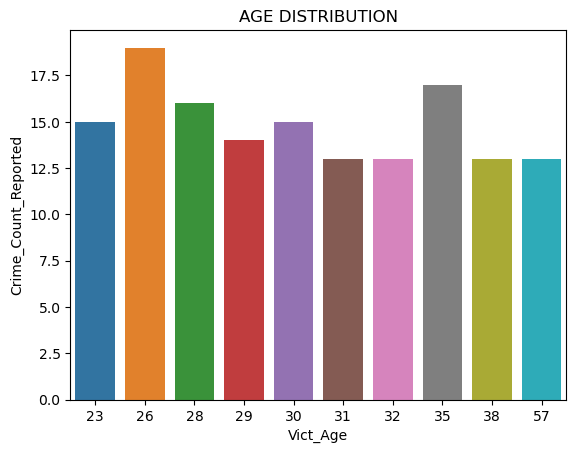

In [ ]:
sns.barplot(x="Vict_Age", y="Crime_Count_Reported" , data = df2)
plt.title('AGE DISTRIBUTION')
plt.show()

#### **Q.3.Is there a significant difference in crime rates between male and female victims?**

In [ ]:
Q_3 = ("SELECT Vict_Sex AS GENDER, COUNT(*) AS Crime_Count,COUNT(*) * 100.0 / SUM(COUNT(*)) OVER () AS Crime_Rate_Percentage FROM crime_data WHERE Vict_Sex LIKE '%M%' OR Vict_Sex LIKE '%F%'GROUP BY Vict_Sex ORDER BY Vict_Sex DESC;")

In [ ]:
cursor.execute(Q_3)

2

In [ ]:
df['Vict_Sex'].unique()

array(['F', 'M', 'X', nan], dtype=object)

In [ ]:
df3 = pd.read_sql_query(Q_3,connection)

C:\Users\Dell\AppData\Local\Temp\ipykernel_7136\624666747.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [ ]:
df3

GENDER  Crime_Count  Crime_Rate_Percentage
0      M          278               64.20323
1      F          155               35.79677

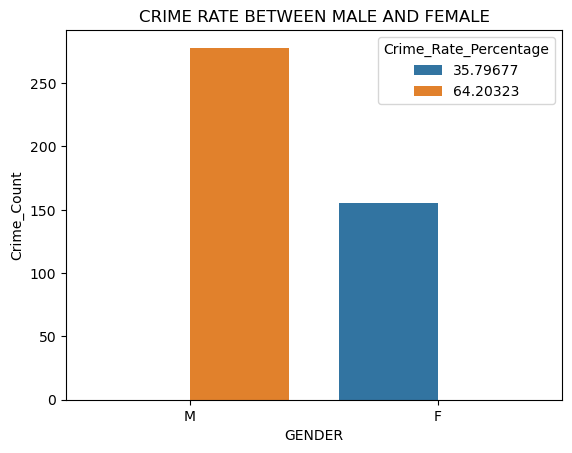

In [ ]:
sns.barplot(x="GENDER" , y="Crime_Count", data = df3,hue='Crime_Rate_Percentage')
plt.title('CRIME RATE BETWEEN MALE AND FEMALE')

plt.show()

## **STATUS ANALYSIS**

---



#### **Q.4.Where do most crimes occur based on the "Location" column?**

In [ ]:
Q_4 = ("select Location , Count(*) as Most_Crime_No from crime_data group by Location order by Most_Crime_No desc limit 10;")

In [ ]:
cursor.execute(Q_4)

10

In [ ]:
df4 = pd.read_sql_query(Q_4,connection)

C:\Users\Dell\AppData\Local\Temp\ipykernel_10808\3874430129.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [ ]:
df4

Location  Most_Crime_No
0    800 N ALAMEDA ST             14
1        700 W 7TH ST             11
2        300 E 5TH ST              6
3  1100 S FIGUEROA ST              6
4                 6TH              6
5     600 S SPRING ST              5
6        100 E 5TH ST              5
7              7TH ST              5
8  500 S SAN PEDRO ST              5
9    800 W OLYMPIC BL              4

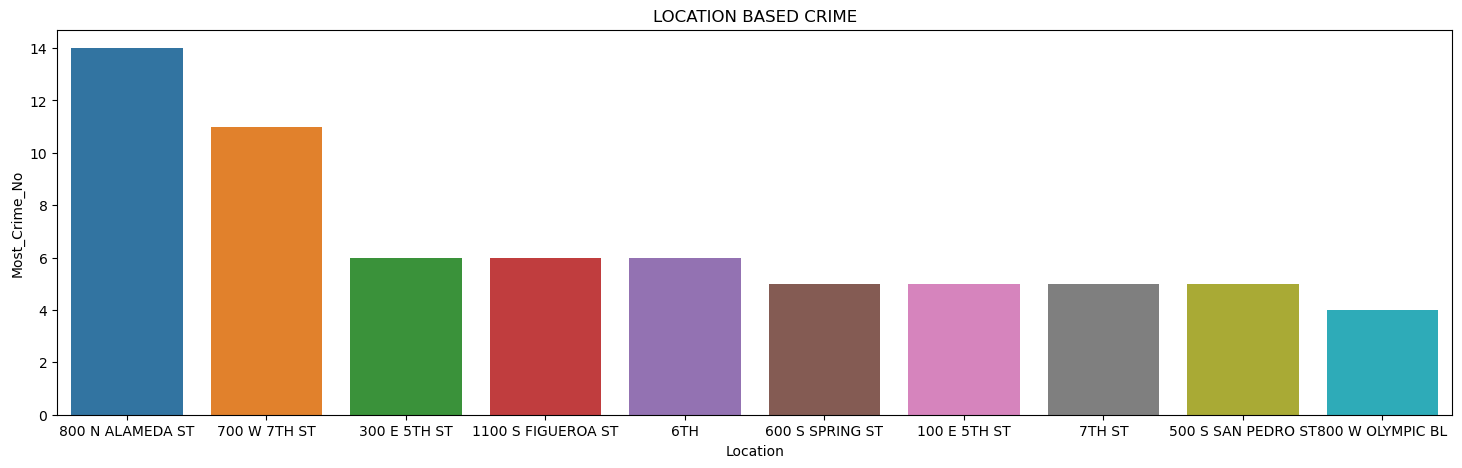

In [ ]:
plt.figure(figsize=(18, 5))
sns.barplot(x="Location" , y="Most_Crime_No", data = df4)
plt.title('LOCATION BASED CRIME')
plt.show()

#### **Q.5. What is the distribution of reported crimes based on Crime Code?**

In [ ]:
Q_5 = ('select Crm_Cd, count(Crm_Cd) as Reported_Crime from crime_data group by Crm_Cd order by Reported_Crime desc limit 10;')

In [ ]:
cursor.execute(Q_5)

10

In [ ]:
df5 = pd.read_sql_query(Q_5,connection)

C:\Users\Dell\AppData\Local\Temp\ipykernel_10808\3848614671.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [ ]:
df5

Crm_Cd  Reported_Crime
0     330              82
1     624              74
2     440              44
3     442              28
4     510              28
5     341              26
6     230              24
7     745              23
8     740              23
9     888              19

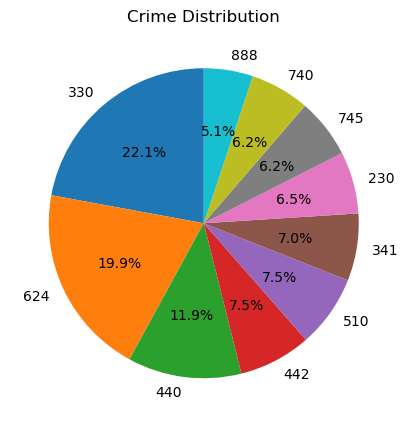

In [ ]:
plt.figure(figsize=(5, 15))
plt.pie(df5['Reported_Crime'], labels=df5['Crm_Cd'], autopct='%1.1f%%', startangle=90)
plt.title('Crime Distribution')
plt.show()